# Tips for choosing profile locations

To help you pick the locations of your profiles, here are a few resources.

## EPSG:3031 Polar Stereographic map
Read x/y coordinates off this map to choose approximate start/end profile points.

In [67]:
%load_ext autoreload
%autoreload 2
import pygmt

from polartoolkit import regions, utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


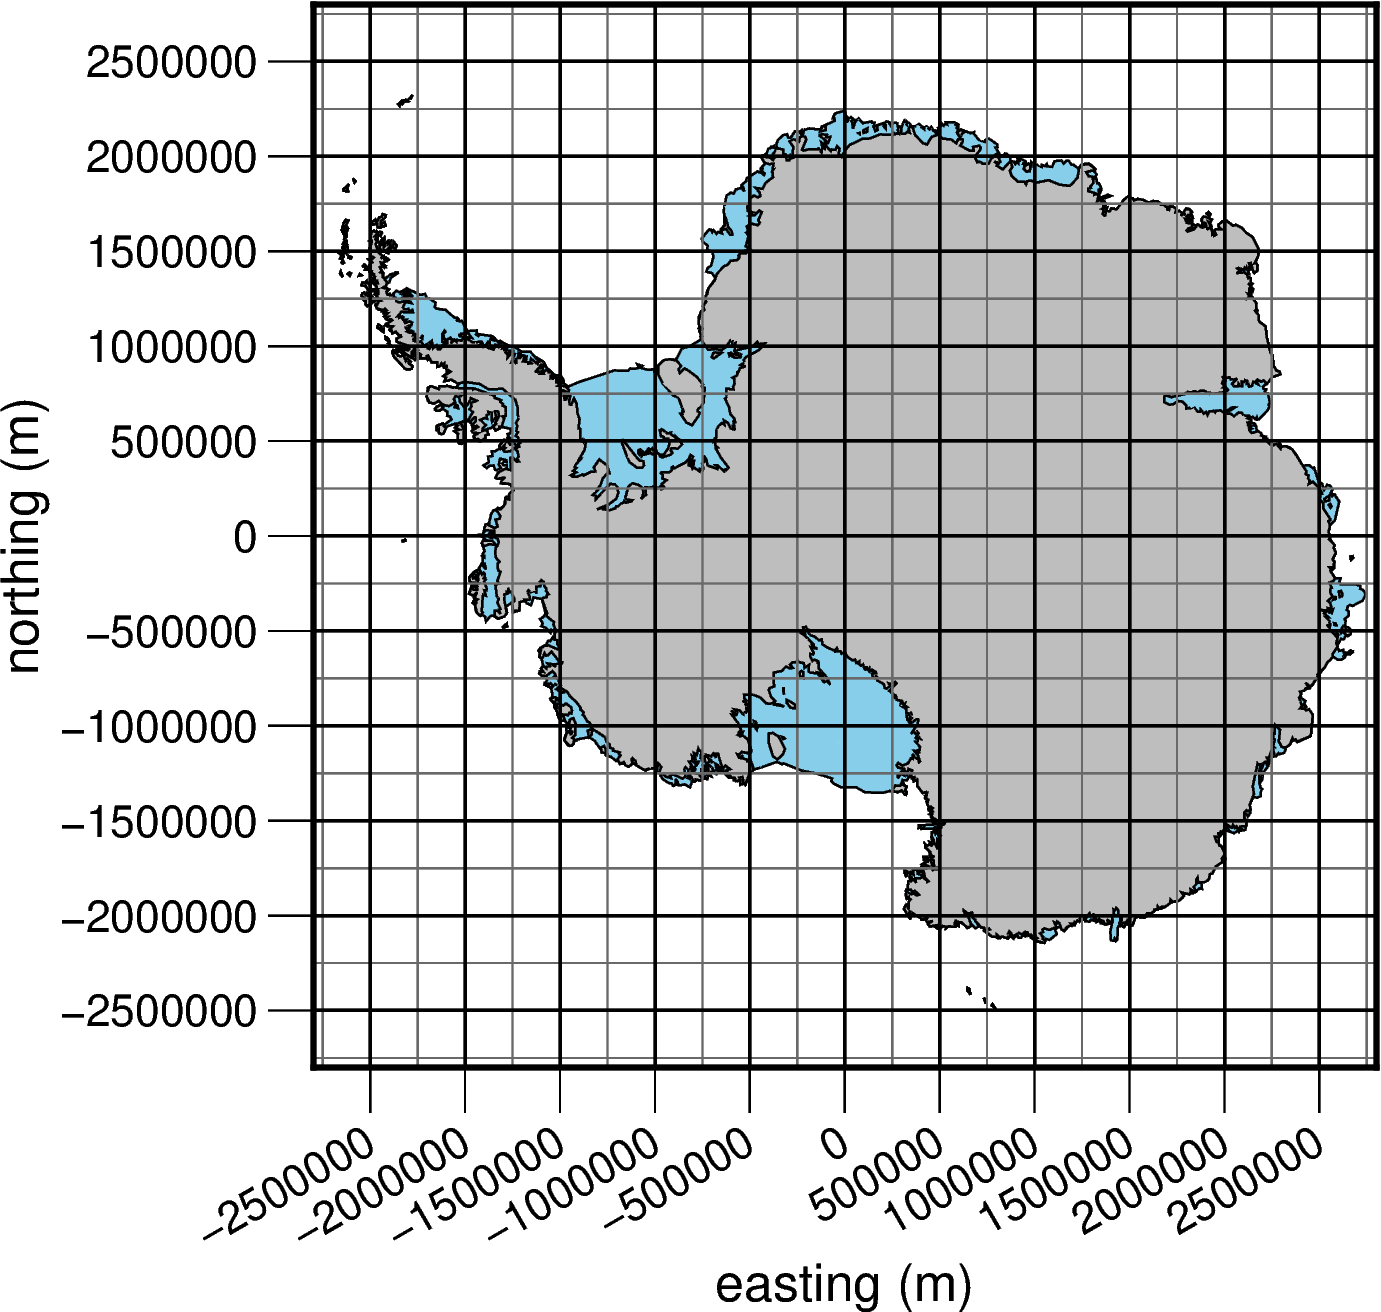

In [50]:
fig = pygmt.Figure()

region = regions.antarctica
fig_proj, fig_proj_ll, fig_width, fig_height = utils.set_proj(
    region=region,
    hemisphere="south",
    fig_height=9,  # cm
)

fig.coast(
    region=(*region, "+ue"),
    projection=fig_proj_ll,
    shorelines="0.5p,black",
    land="skyblue",
)
fig.coast(
    projection=fig_proj_ll, area_thresh="+ag", shorelines="0.5p,black", land="gray"
)

with pygmt.config(
    MAP_GRID_PEN_PRIMARY=".4p,dimgray", MAP_GRID_PEN_SECONDARY=".75p,black"
):
    fig.basemap(
        projection=fig_proj,
        frame=[
            "sxa500000g500000+a30+leasting (m)",
            "pxg250000",
            "sya500000g500000+lnorthing (m)",
            "pyg250000",
        ],
    )
fig.show()

s-45/90/70/1:23333333.333333336


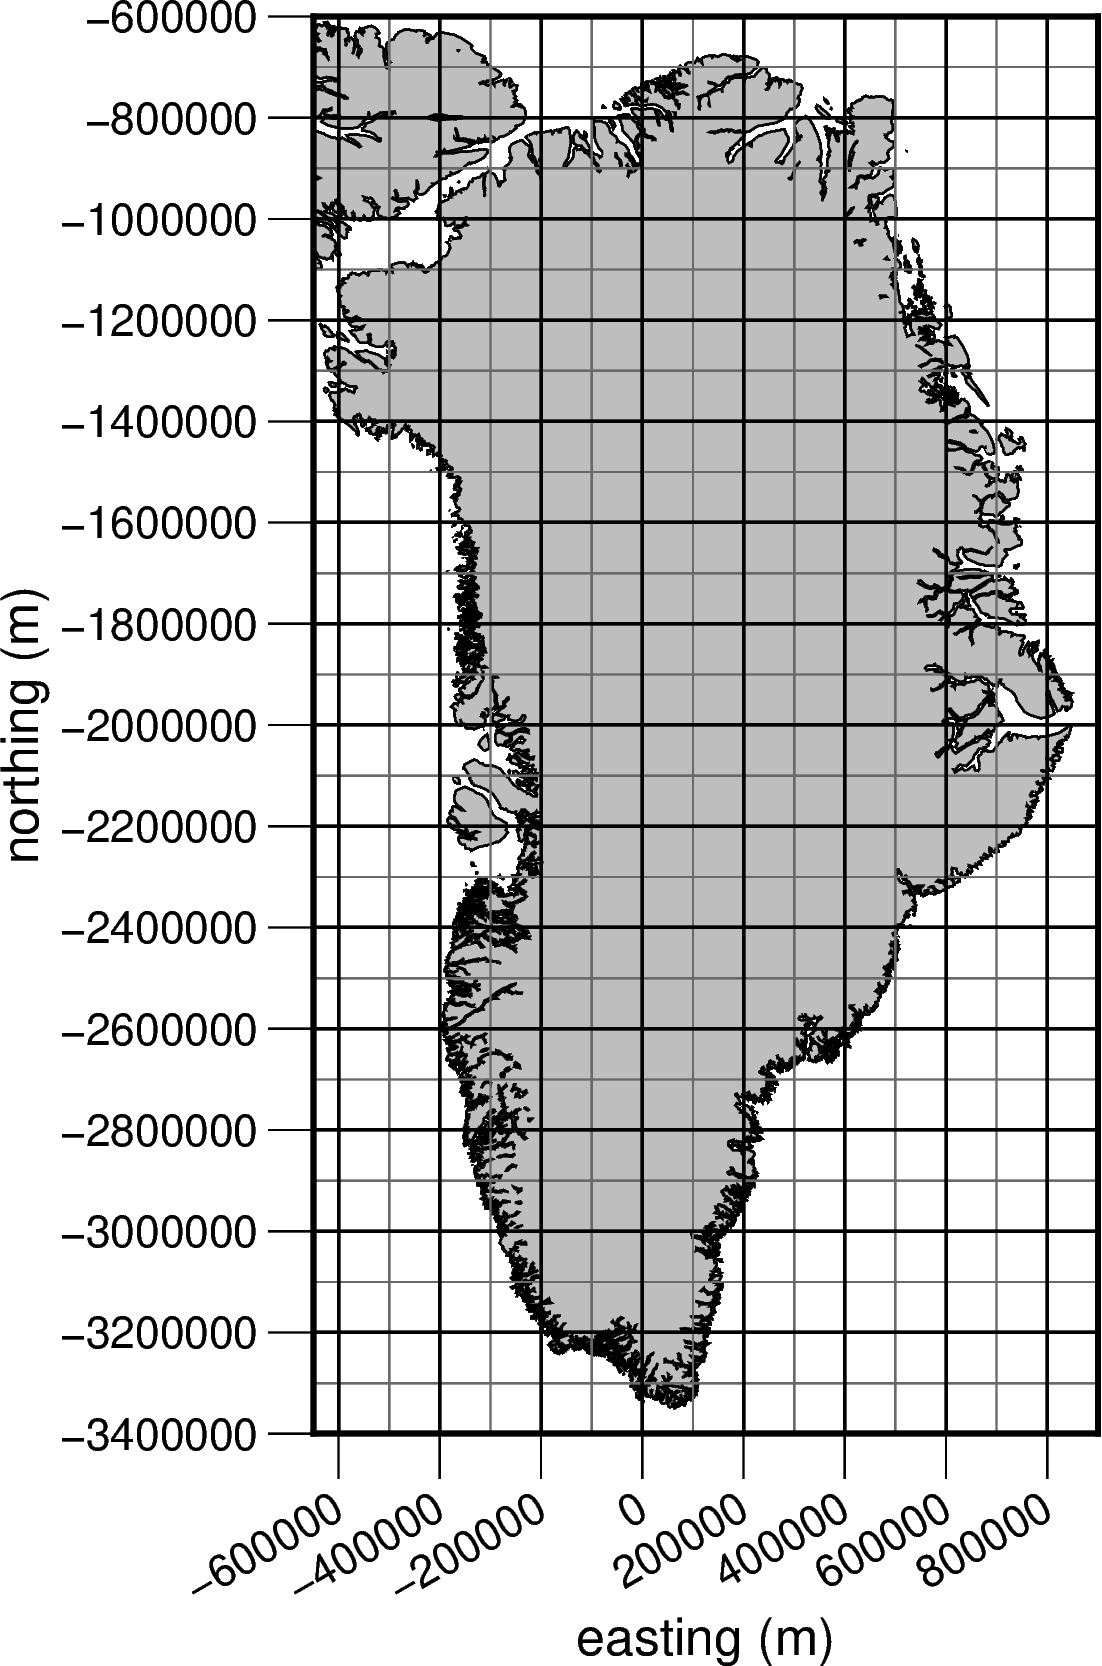

In [68]:
fig = pygmt.Figure()

region = regions.greenland
fig_proj, fig_proj_ll, fig_width, fig_height = utils.set_proj(
    region=region,
    hemisphere="north",
    fig_height=12,  # cm
)
fig_proj
print(fig_proj_ll)
fig.coast(
    region=(*region, "+ue"),
    projection=fig_proj_ll,
    shorelines="0.5p,black",
    land="skyblue",
)
fig.coast(
    projection=fig_proj_ll, area_thresh="+ag", shorelines="0.5p,black", land="gray"
)

with pygmt.config(
    MAP_GRID_PEN_PRIMARY=".4p,dimgray", MAP_GRID_PEN_SECONDARY=".75p,black"
):
    fig.basemap(
        projection=fig_proj,
        frame=[
            "sxa200000g200000+a30+leasting (m)",
            "pxg100000",
            "sya200000g200000+lnorthing (m)",
            "pyg100000",
        ],
    )
fig.show()

Or if you install `ipyleaflet` with `mamba install ipyleaflet`, the below code wil show and interactive map and clicking will give coordinates in EPSG 3031 (if you set `hemisphere`="south"). See the tutorial `profile walkthrough` for an example of extracting a profile from the interactive map, or tutorial `regions_walkthrough` for an example of defining a region from the interactive map.

In [66]:
from polartoolkit import maps

m = maps.interactive_map(hemisphere="south")

Label(value='')

Map(center=[-90, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

## Make custom shapefile in QGIS

QGIS, especially with the [Quantarctica package](https://www.npolar.no/quantarctica/#toggle-id-2), is an easy way to make a custom shapefile. This can then be used with `polartoolkit` to sample data along the file.

To make the shapefile in QGIS:
*  Layer -> Create Layer -> New Shapefile Layer
* For `Geometry Type`, select `Polygon`
* Select `EPSG:3031` for the coordinate reference system
* Save to the same directory as your python file you want to work with.